### Kock Out Stage
    Qualified Teams will play in this Stage: Round of 16, Round of 8, Round of 4 and Final
    Only Win -Lose, No Draw

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [2]:
final_df = pd.read_csv('final_df.csv')
final_df.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,Team1_0_Win,Team1_1_Lose,Team1_2_Draw
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,40,29,31
1,Brazil,Mexico,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,78,9,13
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,57,20,23
3,Guinea,Sierra Leone,65,86,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,59,18,22
4,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,53,22,25


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from datetime import datetime

from datetime import timedelta

# Import KFold
from sklearn.model_selection import KFold

#### Drop Draw Result

In [4]:
knock_df = final_df[final_df['Team1_Result'] != 2]

In [5]:
knock_df = knock_df.drop('Team1_2_Draw',axis=1)

In [6]:
knock_df

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,Team1_0_Win,Team1_1_Lose
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,40,29
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,57,20
3,Guinea,Sierra Leone,65,86,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,59,18
4,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,53,22
5,Peru,Colombia,70,19,0,68.0,78.0,72.0,76.0,74.0,79.0,80.0,78.0,49,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,Moldova,Andorra,180,153,1,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,20,53
23917,Liechtenstein,Latvia,192,135,0,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,9,74
23918,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,59,23
23919,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,55,22


### Encode

In [7]:
final_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X_k = knock_df.drop('Team1_Result',axis=1)
y_k = knock_df['Team1_Result']

In [8]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k, test_size=0.3, random_state=42)

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_k, y_train_k)

In [10]:
# Rename the variables to make it easier to use
X_train_k = X_train_smote.copy()
X_test_k = X_test_k.copy()
y_train_k = y_train_smote.copy()
y_test_k = y_test_k.copy()

In [11]:
y_train_k.value_counts()

1    8186
0    8186
Name: Team1_Result, dtype: int64

### Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
from feature_engine.wrappers import SklearnTransformerWrapper
scaler = SklearnTransformerWrapper(transformer= MinMaxScaler())

In [13]:
#####Feature Engine
X_train_k =scaler.fit_transform(X_train_k)
X_test_k = scaler.transform(X_test_k)

In [14]:
X_train_k.head()

,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,...,Team2_United Arab Emirates,Team2_Uruguay,Team2_Uzbekistan,Team2_Vanuatu,Team2_Venezuela,Team2_Vietnam,Team2_Wales,Team2_Yemen,Team2_Zambia,Team2_Zimbabwe
0,0.400000,0.866667,0.10,0.06,0.380952,0.325581,0.404762,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.204762,0.147619,0.60,0.60,0.595238,0.674419,0.690476,0.666667,0.627907,0.627907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.600000,0.480952,0.32,0.40,0.547619,0.000000,0.000000,0.404762,0.441860,0.418605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.085714,0.195238,0.62,0.64,0.476190,0.488372,0.500000,0.547619,0.511628,0.558140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.861905,0.219048,0.32,0.54,0.000000,0.000000,0.214286,0.619048,0.511628,0.651163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection

In [15]:
models = [
    LogisticRegression(multi_class='auto', max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=100),
    SVC(kernel='rbf'),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=6),
    KNeighborsClassifier(n_neighbors=12),
    AdaBoostClassifier(n_estimators=100)
    
]

In [16]:
def get_model_name(model):
    model_name = model.__class__.__name__
    if model_name == 'RandomForestClassifier':
        model_name += '_' + str(model.n_estimators)
    elif model_name == 'SVC':
        model_name += '_' + str(model.kernel)
    elif model_name == 'KNeighborsClassifier':
        model_name += '_' + str(model.n_neighbors)
        
    
    return model_name

In [17]:
# Number of cross validation
kf = KFold(n_splits=10)

# Dataframe to store the model selection results
cv_df = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train_k, y_train_k, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train_k, y_train_k)
    accuracy_train = round(model.score(X_train_k, y_train_k) * 100, 3)
    accuracy_test = round(model.score(X_test_k, y_test_k) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df = pd.concat([cv_df, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

In [18]:
metrics = cv_df.sort_values(by=['mean_score'], ascending=False)
metrics

,model,mean_score,std_score,accuracy_train,accuracy_test,time
4,SVC_rbf,0.807725,0.085915,84.956,76.996,0:04:29.106539
5,SVC_linear,0.799907,0.076515,81.933,77.140,0:09:06.247550
0,LogisticRegression,0.798930,0.070830,81.517,76.727,0:00:11.497869
2,RandomForestClassifier_50,0.789034,0.068585,99.780,74.712,0:00:06.380469
3,RandomForestClassifier_100,0.788668,0.065846,99.805,74.694,0:00:10.922107
8,AdaBoostClassifier,0.736013,0.009524,76.423,73.705,0:00:11.647695
1,GaussianNB,0.722276,0.124164,74.291,65.647,0:00:01.468902
7,KNeighborsClassifier_12,0.644465,0.169728,68.794,57.446,0:00:01.514761
6,KNeighborsClassifier_6,0.637136,0.178034,70.297,55.360,0:00:01.457109


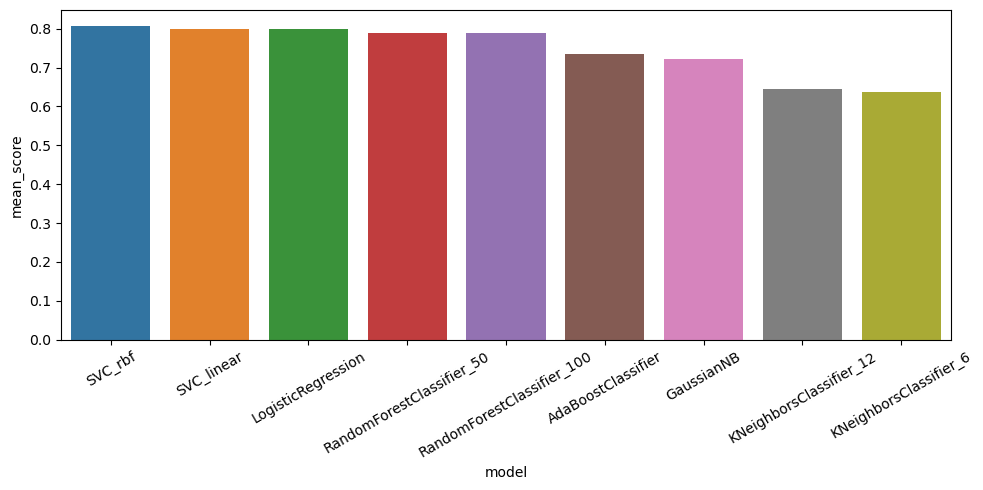

In [19]:
# Plot the cross validation score for the models
plt.figure(figsize=(10, 5), tight_layout=True)
sns.barplot(x='model', y='mean_score', data=metrics)
plt.xticks(rotation=30)
plt.show()

### Best Model selection
- Do hạn chế về tài nguyên,
- Độ lệch chuẩn thấp
- Thời gian tối ưu
- Accuracy của tập train và test tương đối sát, cho thấy mô hình hiệu quả ở mức chấp nhận được 

### Params trials

In [20]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV

# Create a list of parameters of Logistic Regression for the GridSearchCV
param_grid = {
    'n_estimators': [100,300, 500, 1000],
    'learning_rate':[0.001,0.01,0.1, 1]
}
# Create a list of models to test
clf_grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_grid, cv=5, n_jobs=-1)
search_clf = clf_grid.fit(X_train_k, y_train_k)
best_clf = search_clf.best_estimator_

#Score
cross_clf = cross_val_score(best_clf, X_test_k, y_test_k, scoring='accuracy', cv=5, n_jobs=-1)

In [21]:
print('Best params:', search_clf.best_params_)

Best params: {'learning_rate': 1, 'n_estimators': 1000}


### Best Params into Model

In [22]:
## Create the best model
best_model = AdaBoostClassifier(n_estimators=1000,learning_rate=1)
# Fit the best model to the training data
best_model.fit(X_train_k, y_train_k)
y_pred = best_model.predict(X_test_k)

### Metrics

In [28]:
# Get the accuracy score for the best model
accuracy_train = round(best_model.score(X_train_k, y_train_k) * 100, 3)
accuracy_test = round(best_model.score(X_test_k, y_test_k) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train)
print('Accuracy score for the best model on the test data: ', accuracy_test)

Accuracy score for the best model on the training data:  81.707
Accuracy score for the best model on the test data:  76.043


              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1985
           1       0.81      0.81      0.81      3575

    accuracy                           0.76      5560
   macro avg       0.74      0.74      0.74      5560
weighted avg       0.76      0.76      0.76      5560



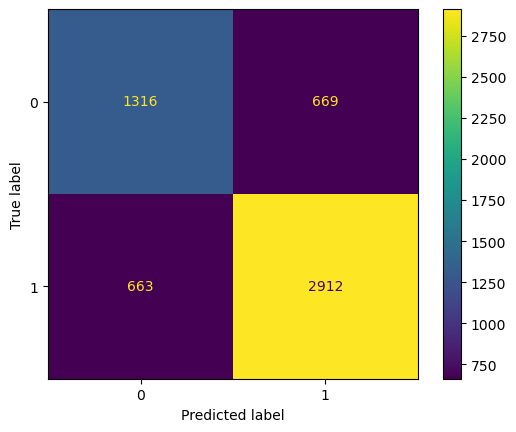

In [24]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_k,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test_k,y_pred);

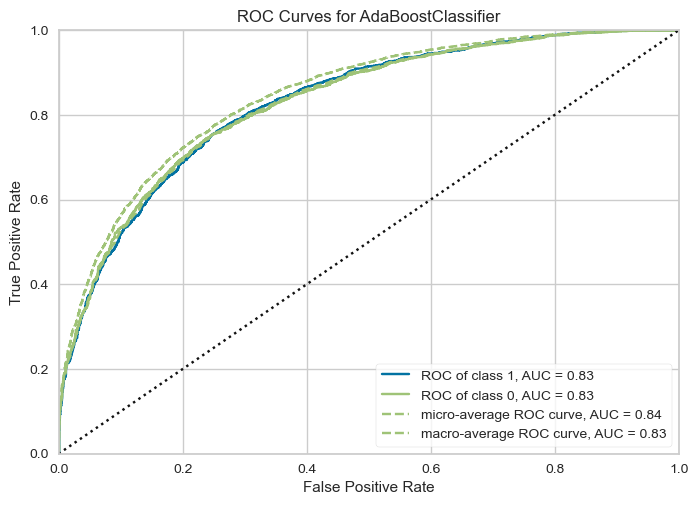

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model, classes=y_k.unique())

visualizer.fit(X_train_k, y_train_k)        # Fit the training data to the visualizer
visualizer.score(X_test_k, y_test_k)        # Evaluate the model on the test data
visualizer.show()

### Comment:
- Mô hình cải thiện tốt hơn 
- Khả năng phân loại 83% cho cả 2 class
- ROC cũng cũng tốt hơn

### Save Model

In [26]:
import pickle
# Save to file in the current working directory 
pkl_filename = "KnockstageFIFA.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)